
---

# **Notebook 13 : Visualisation de la Création des Produits et Répartition par Pays**

---

### **1. Importation des Bibliothèques**

Dans cette section, nous importons les bibliothèques nécessaires pour la manipulation des données et la création de graphiques.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### **2. Chargement et Préparation des Données**

Nous allons charger les données des produits depuis le répertoire `09_translated_countries` pour analyser la création des produits par année et la répartition par pays.

In [2]:
# Définir le répertoire d'entrée
input_directory = 'note-books/phase_1_data/12_filtrage_pays_nutri_score'


In [3]:
# Initialiser une liste pour stocker les données de chaque fichier
data = []

# Parcourir les fichiers CSV dans le répertoire
for file_name in os.listdir(input_directory):
    file_path = os.path.join(input_directory, file_name)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print(f"Problème d'encodage pour {file_name}. Réessai avec 'utf-8'.")
        df = pd.read_csv(file_path, encoding='utf-8', errors='replace')
    
    # Vérifier que les colonnes 'created_datetime' et 'countries' existent
    if 'created_datetime' in df.columns and 'countries' in df.columns:
        data.append(df[['created_datetime', 'countries']])
    else:
        print(f"Colonnes nécessaires non trouvées dans {file_name}. Ignoré.")

# Fusionner toutes les données dans un DataFrame unique
if data:
    full_data = pd.concat(data, ignore_index=True)
else:
    print("Aucune donnée disponible pour l'analyse.")

---

### **3. Création du Bargraph : Produits Créés par Année**

Nous analysons la colonne `created_datetime` pour extraire l'année de création de chaque produit. Ensuite, nous créons un graphique à barres pour représenter le nombre de produits créés chaque année.

/var/folders/l_/z4yzpdw13r1_992xyftwcsmr0000gn/T/ipykernel_3050/2735346000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produits_par_annee.index, y=produits_par_annee.values, palette='viridis')


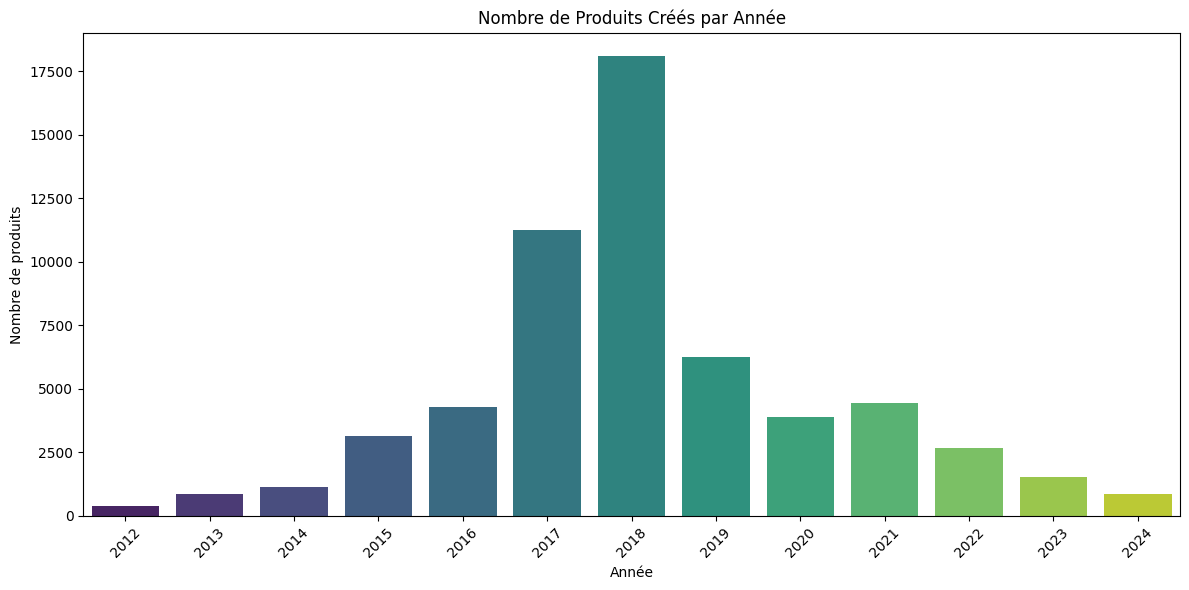

Graphique des produits créés par année sauvegardé dans note-books/phase_1_data/graphique/produits_par_annee.png


In [4]:
# Extraire l'année à partir de la colonne 'created_datetime'
full_data['created_datetime'] = pd.to_datetime(full_data['created_datetime'], errors='coerce')
full_data['année_creation'] = full_data['created_datetime'].dt.year

# Compter le nombre de produits créés par année
produits_par_annee = full_data['année_creation'].value_counts().sort_index()

# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=produits_par_annee.index, y=produits_par_annee.values, palette='viridis')
plt.title('Nombre de Produits Créés par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=45)

# Sauvegarder le graphique
output_graph_path_annee = 'note-books/phase_1_data/graphique/produits_par_annee.png'
plt.tight_layout()
plt.savefig(output_graph_path_annee)
plt.show()

print(f"Graphique des produits créés par année sauvegardé dans {output_graph_path_annee}")

---

### **4. Création du Graphique de Répartition des Produits par Pays**

Dans cette section, nous générons un graphique en barres pour visualiser la répartition du nombre de produits par pays. Les pays sont affichés sur l'axe Y et le nombre de produits sur l'axe X.


/var/folders/l_/z4yzpdw13r1_992xyftwcsmr0000gn/T/ipykernel_3050/1472436960.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre de produits', y='Pays', data=produits_par_pays_counts, palette='viridis')


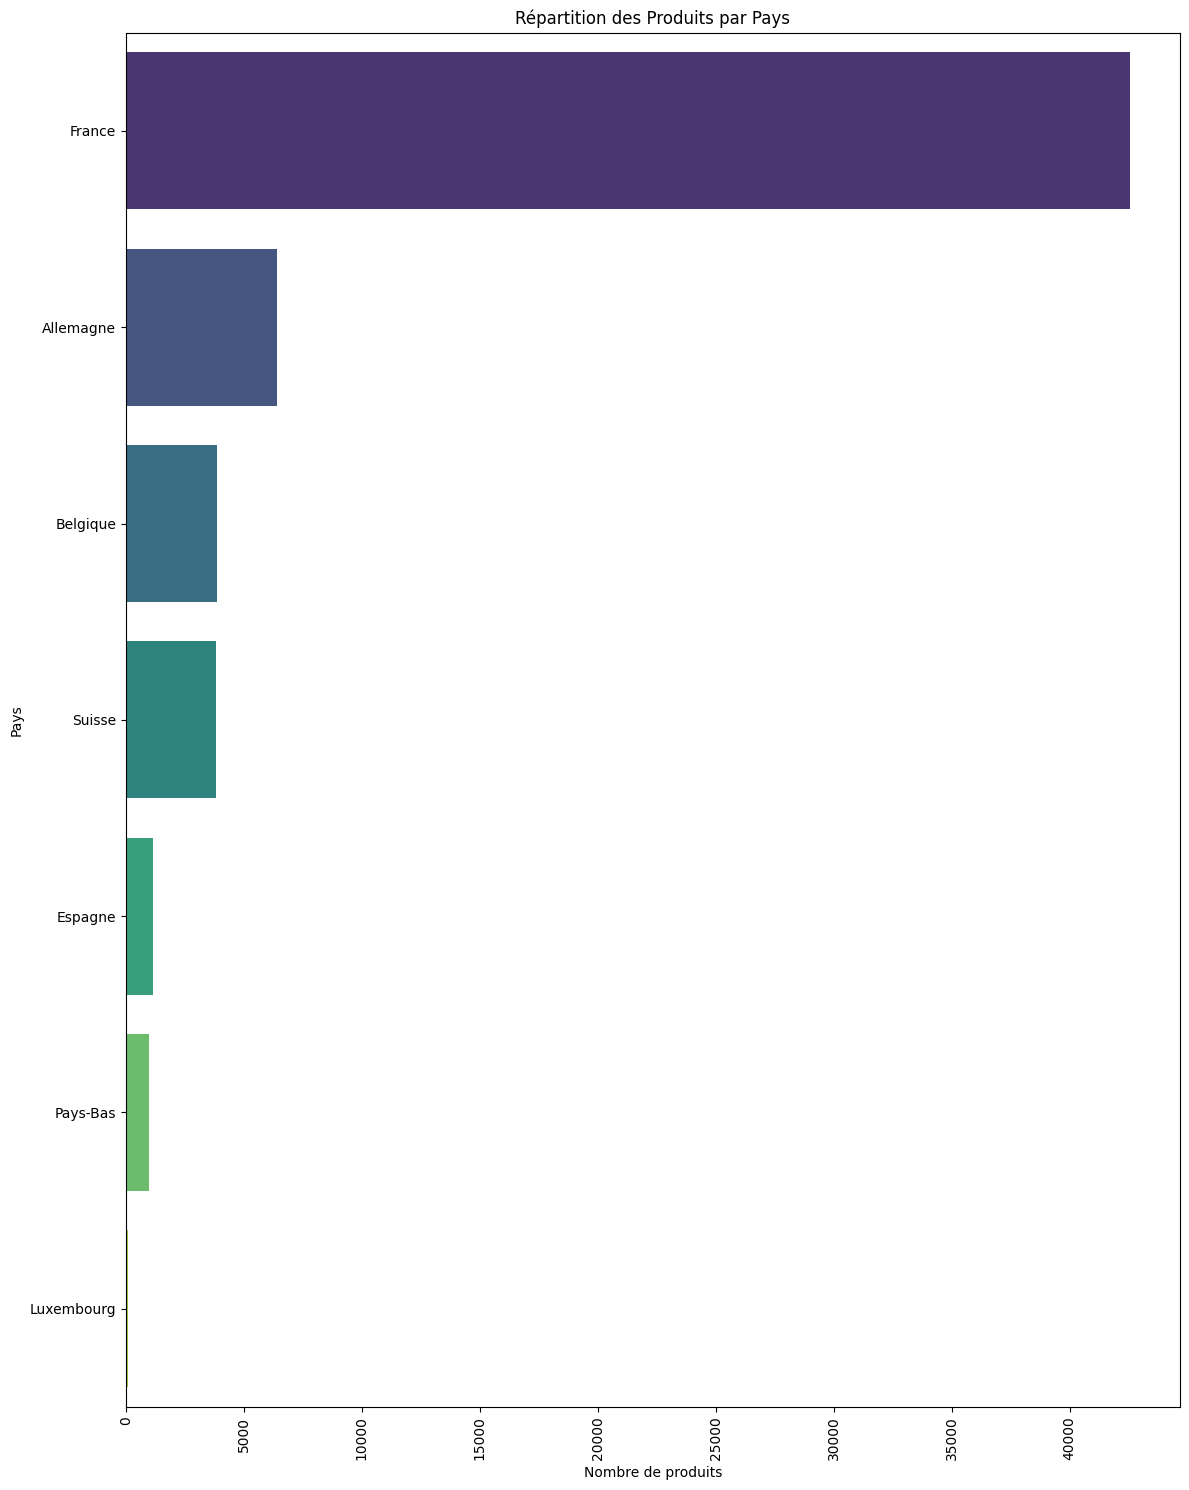

Graphique de répartition des produits par pays sauvegardé dans note-books/phase_1_data/graphique/repartition_produits_par_pays.png


In [6]:
# Nettoyage et comptage des occurrences des pays
produits_par_pays = full_data['countries'].str.split(',').explode().str.strip()
produits_par_pays = produits_par_pays[produits_par_pays.notna()]

# Compter le nombre de produits par pays
produits_par_pays_counts = produits_par_pays.value_counts().reset_index()
produits_par_pays_counts.columns = ['Pays', 'Nombre de produits']

# Création du graphique de répartition des produits par pays
plt.figure(figsize=(12, 15))
sns.barplot(x='Nombre de produits', y='Pays', data=produits_par_pays_counts, palette='viridis')
plt.title('Répartition des Produits par Pays')
plt.xlabel('Nombre de produits')
plt.ylabel('Pays')

# Ajustement des graduations de l'axe X pour lisibilité
plt.xticks(rotation=90)

# Sauvegarder et afficher le graphique
output_graph_path_pays = 'note-books/phase_1_data/graphique/repartition_produits_par_pays.png'
plt.tight_layout()
plt.savefig(output_graph_path_pays)
plt.show()

print(f"Graphique de répartition des produits par pays sauvegardé dans {output_graph_path_pays}")



---

### **Explications :**

- **Affichage des pays** : Les pays sont affichés par ordre décroissant du nombre de produits pour une vue d’ensemble claire.
- **Palette de couleurs** : La palette utilisée permet de distinguer facilement les différentes quantités.
- **Sauvegarde du graphique** : Le graphique est enregistré pour permettre une réutilisation facile.

---